<a href="https://colab.research.google.com/github/AnxuAafid/ML-Projects/blob/main/breastcancer_EDA%2CBAlancing_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer

In this problem we need to see if we can predict if a person will alive or dead with Breast Cancer, we don't have a big database, our data date has 4024 values and 16 columns, here we will use the "Breast_Cancer.csv" database that has been made available for use , below you will see an analysis of the data, the processing of that data, class balancing, and the use of machine learning classification models to achieve our goal.

In [ ]:
import pandas as pd
import numpy as np
dset = pd.read_csv("/content/Breast_Cancer.csv")
dset.head(2)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dset.shape

(4024, 16)

In [ ]:
for col in dset.columns:
  print(col)

Age
Race
Marital Status
T Stage 
N Stage
6th Stage
differentiate
Grade
A Stage
Tumor Size
Estrogen Status
Progesterone Status
Regional Node Examined
Reginol Node Positive
Survival Months
Status


In [ ]:
dset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4024.0,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0
Tumor Size,4024.0,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0
Regional Node Examined,4024.0,14.357107,8.099675,1.0,9.0,14.0,19.0,61.0
Reginol Node Positive,4024.0,4.158052,5.109331,1.0,1.0,2.0,5.0,46.0
Survival Months,4024.0,71.297962,22.921430,1.0,56.0,73.0,90.0,107.0


In [ ]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

#2. Data Analysis

 Verifying the correlation between our variables.
Checking the correlation between our variables, here we can see that we don't have a strong correlation between the variables

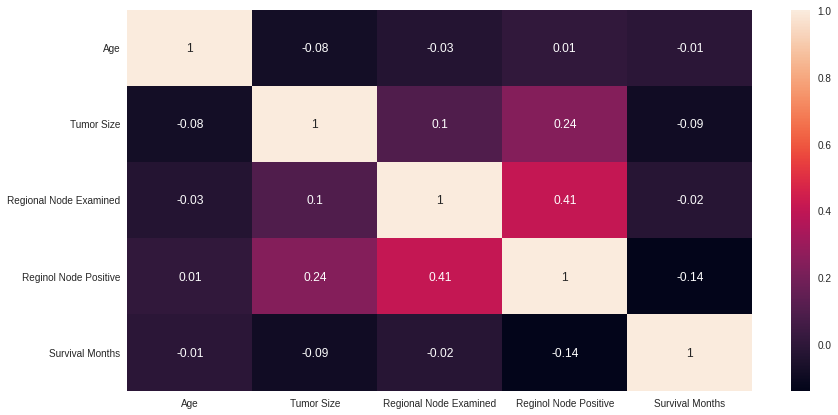

In [ ]:
correlation = dset.corr().round(2)
plt.figure(figsize=(14,7))
sns.heatmap(correlation, annot= True, )

"Categorical Variables"
Looking at our variable "Race" we can see that we have more white people, most people in our database are married, when we look at T-Stage we have more concentration on T1 and T2 stage, when we look at N Stage we have more concentration in N1, looking at our "differentiate" variable we can see that most of them are moderately differentiated, most of them are Regional, with Estrogen and Progesterone Positive and when we look at our target variable we can see that we have more people alive than dead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


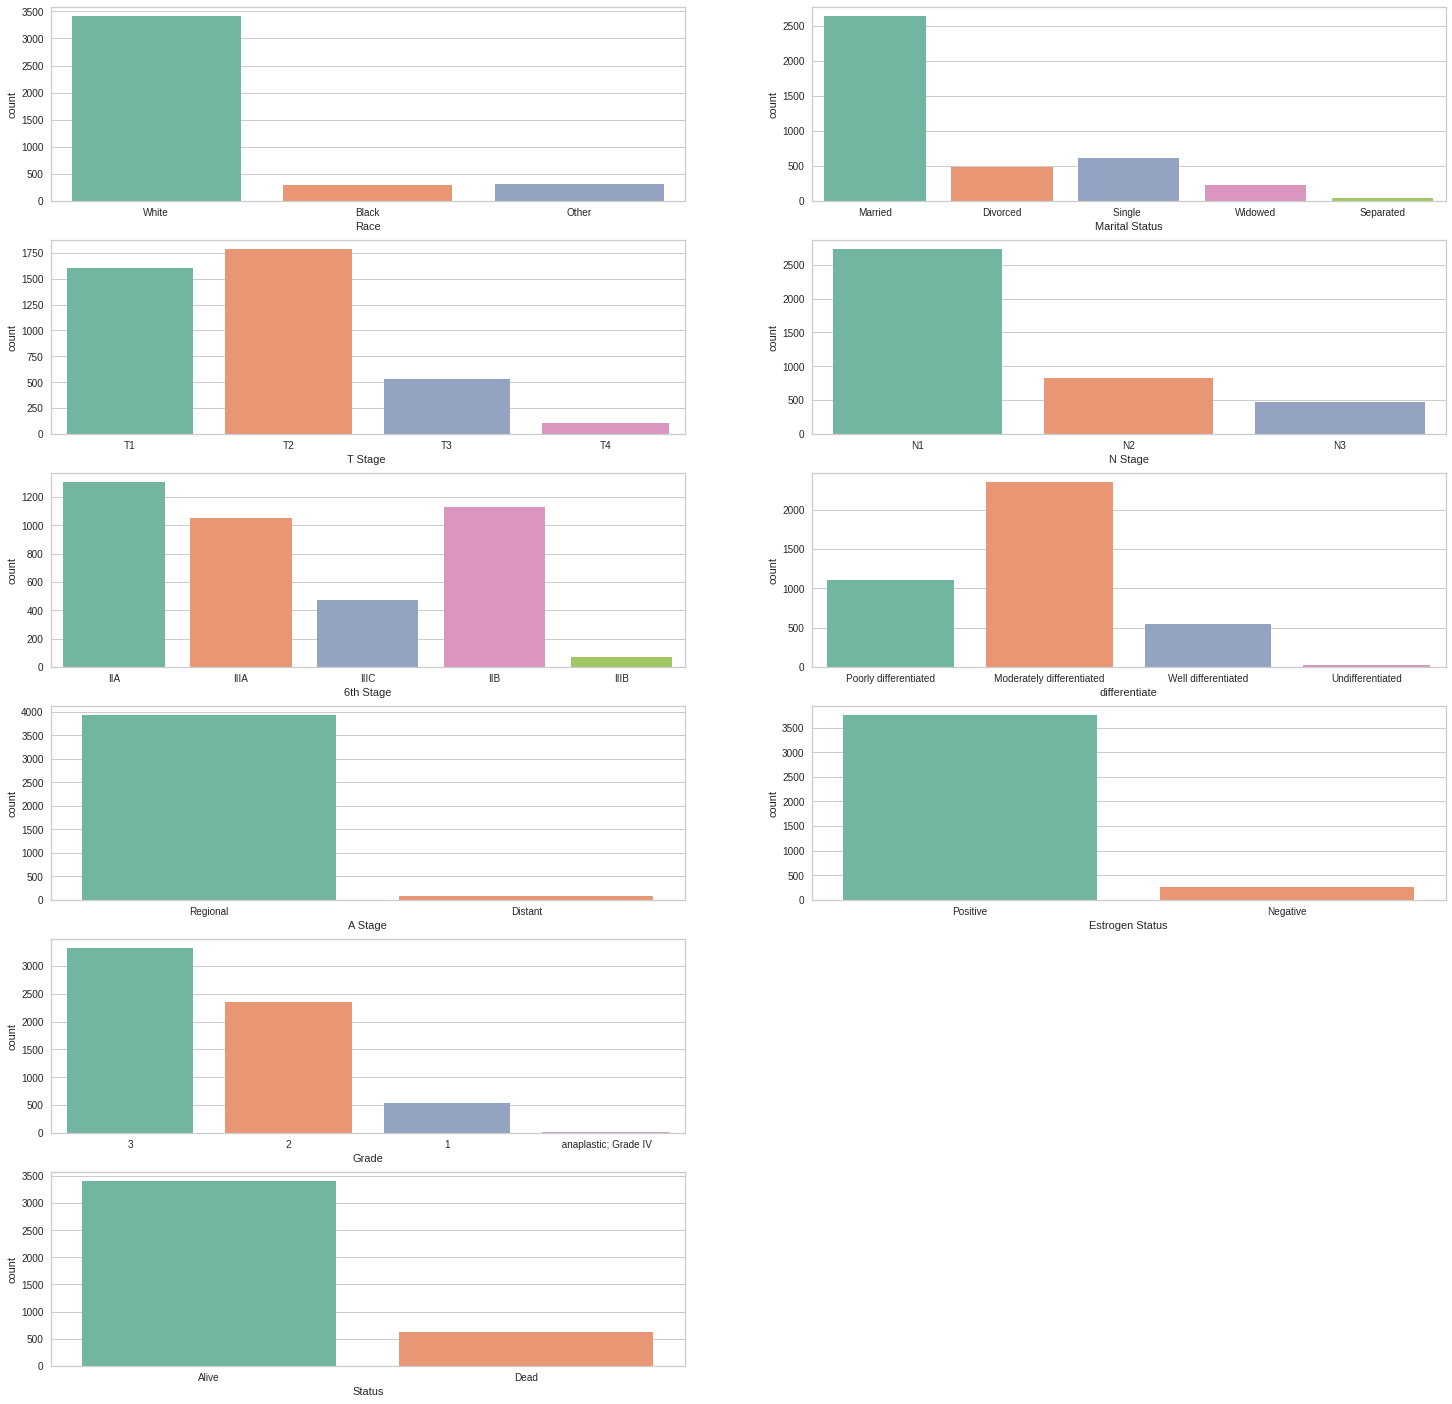

In [ ]:
plt.figure(figsize = (25,25))

plt.subplot(6,2,1)
sns.countplot(x = 'Race', palette='Set2', data = dset)

plt.subplot(6,2,2)
sns.countplot(x = 'Marital Status', palette='Set2', data = dset)

plt.subplot(6,2,3)
sns.countplot(x = 'T Stage ', palette='Set2', data = dset)

plt.subplot(6,2,4)
sns.countplot(x = 'N Stage', palette='Set2', data = dset)

plt.subplot(6,2,5)
sns.countplot(x = '6th Stage', palette='Set2', data = dset)

plt.subplot(6,2,6)
sns.countplot(x = 'differentiate', palette='Set2', data = dset)

plt.subplot(6,2,7)
sns.countplot(x = 'A Stage', palette='Set2', data = dset)

plt.subplot(6,2,8)
sns.countplot(x = 'Estrogen Status', palette='Set2', data = dset)

plt.subplot(6,2,9)
sns.countplot(x = 'Progesterone Status', palette='Set2', data = dset)

plt.subplot(6,2,9)
sns.countplot(x = 'Grade', palette='Set2', data = dset)

plt.subplot(6,2,11)
sns.countplot(x = 'Status', palette='Set2', data = dset)

ValueError: ignored

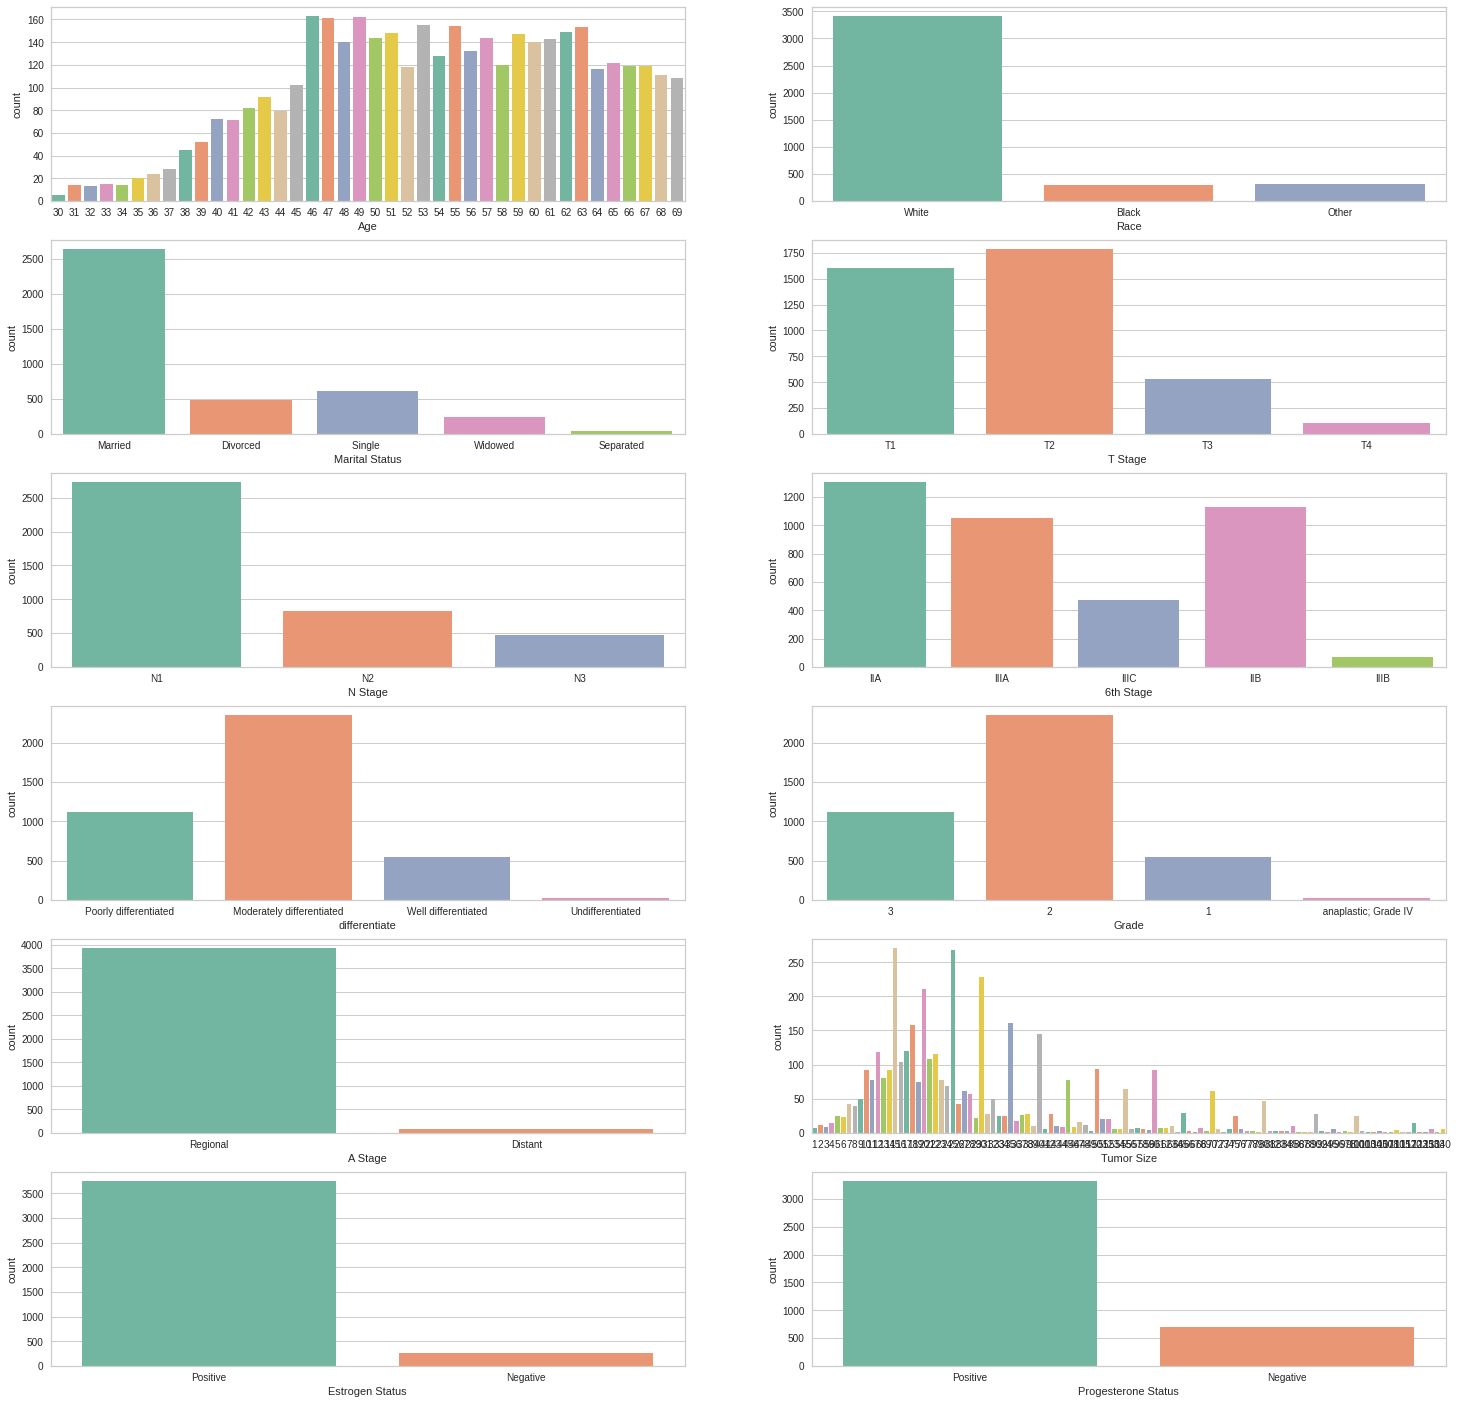

In [ ]:
#plt.subplot(6,2,11)
#sns.countplot(x = 'Status', palette='Set2', data = dset)

ls_col = []
for col in dset.columns:
  ls_col.append(col)
plt.figure(figsize = (25,25))
for i in range(1,len(ls_col)):
  plt.subplot(6,2,i)
  sns.countplot(x=ls_col[i-1],palette='Set2', data = dset)

In [ ]:
dset['Race'].value_counts()

White    3413
Other     320
Black     291
Name: Race, dtype: int64

In [ ]:
"""for i in range(len(ls_col)):
  print("value count of {}".format(ls_col[i]))
  print(dset[ls_col[i]].value_counts())"""

'for i in range(len(ls_col)):\n  print("value count of {}".format(ls_col[i]))\n  print(dset[ls_col[i]].value_counts())'

In [ ]:
dset['Marital Status'].value_counts()

Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: Marital Status, dtype: int64

In [ ]:

ls_col

['Age',
 'Race',
 'Marital Status',
 'T Stage ',
 'N Stage',
 '6th Stage',
 'differentiate',
 'Grade',
 'A Stage',
 'Tumor Size',
 'Estrogen Status',
 'Progesterone Status',
 'Regional Node Examined',
 'Reginol Node Positive',
 'Survival Months',
 'Status']

In [ ]:
dset['T Stage '].value_counts()

T2    1786
T1    1603
T3     533
T4     102
Name: T Stage , dtype: int64

In [ ]:
dset['N Stage'].value_counts()

N1    2732
N2     820
N3     472
Name: N Stage, dtype: int64

In [ ]:
dset['6th Stage'].value_counts()

IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: 6th Stage, dtype: int64

In [ ]:
dset['differentiate'].value_counts()

Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: differentiate, dtype: int64

In [ ]:
dset['A Stage'].value_counts()

Regional    3932
Distant       92
Name: A Stage, dtype: int64

In [ ]:
dset['Estrogen Status'].value_counts()

Positive    3755
Negative     269
Name: Estrogen Status, dtype: int64

In [ ]:
dset['Progesterone Status'].value_counts()

Positive    3326
Negative     698
Name: Progesterone Status, dtype: int64

In [ ]:
dset['Grade'].value_counts()

2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: Grade, dtype: int64

In [ ]:
dset['Status'].value_counts()

Alive    3408
Dead      616
Name: Status, dtype: int64

## "Continuous Variables"
Looking at our continuous variables we can see that we have more elderly people in our base, we have a peak at 50-55-60 years old, when we look at the Regional Node Examined we can see that our top is around 15 and that most of our data is within 0-20, when we look at the Regionol Node Positive variable we can see pretty much the same behavior as the Regional Node Examined, most of the data is between 0-10 and the peak at 2, when we look at the variable Tumor Size we can see that we have the peak at 20 and that most of the data are at 15-25, when we look at the Survival Months variable we can see that the smaller the value of the variable the less values ​​we have, the vast majority are between 60 and 100.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


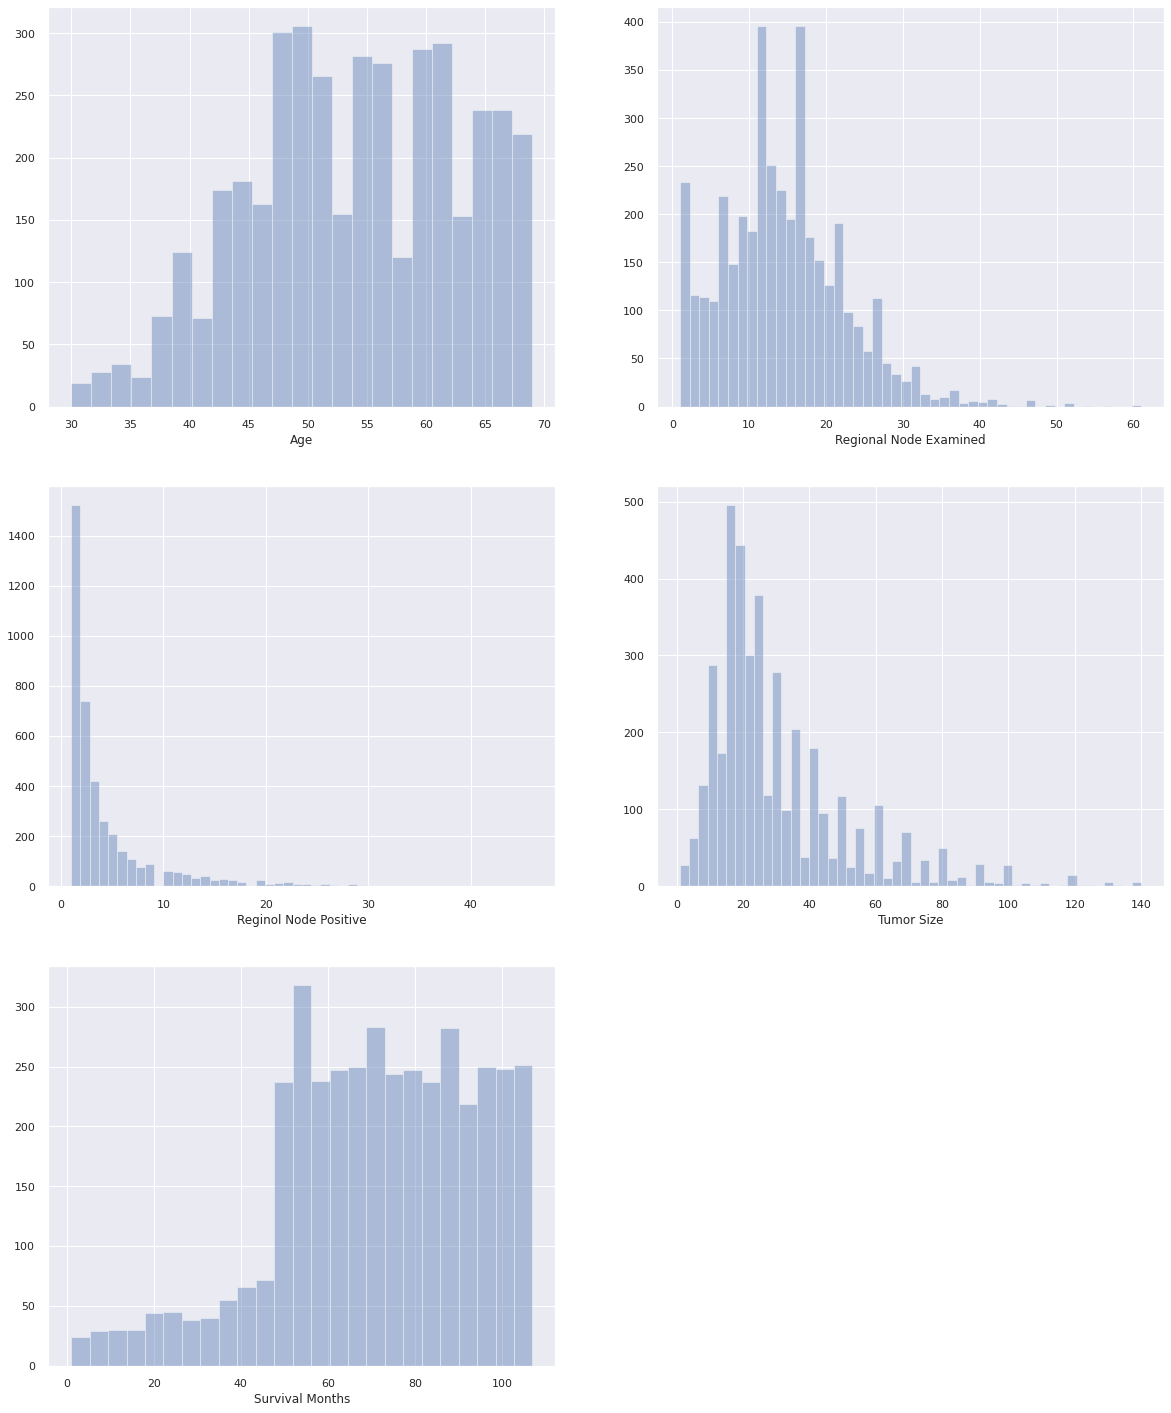

In [ ]:
plt.figure(figsize = (20,25))

sns.set(color_codes = True)

plt.subplot(3,2,1)
sns.distplot(dset.Age, kde = False)

plt.subplot(3,2,2)
sns.distplot(dset['Regional Node Examined'], kde = False)

plt.subplot(3,2,3)
sns.distplot(dset['Reginol Node Positive'], kde = False)

plt.subplot(3,2,4)
sns.distplot(dset['Tumor Size'] , kde = False)

plt.subplot(3,2,5)
sns.distplot(dset['Survival Months'], kde = False)

##Bivariate Analysis
Looking at our categorical variables comparing with our target variable I couldn't see a very different behavior.
#############Looking at our target variable comparing with our explanatory variables we can see that Single people have a good difference compared to pairs when we look at people who will die or live, when we look at the Differentiate variable we can see that "Well Differentiated" people have a difference when comparing when the person will live or die, in the N Stage variable we can verify this difference also with the value of N3, looking at the 6th stage variable we can have a good insight, people with #A usually don't have big problems, unlike the person who have IIIC who generally have more problems with Brain Stroke than the other variable values.¶

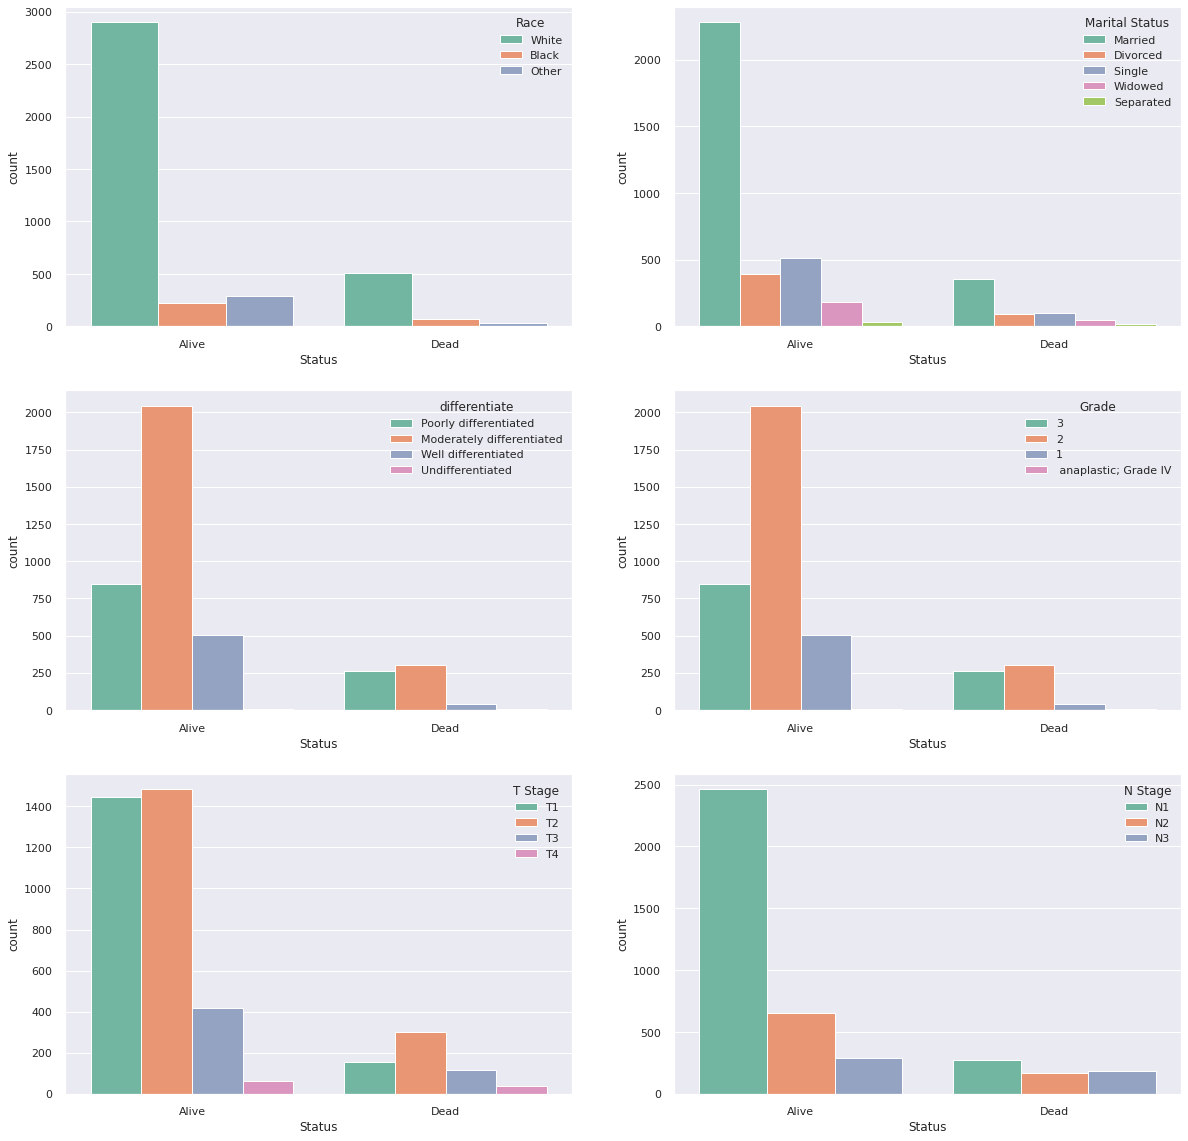

In [ ]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'Status', hue= 'Race', palette='Set2', data = dset)

plt.subplot(3,2,2)
sns.countplot(x = 'Status', hue= 'Marital Status', palette='Set2', data = dset)

plt.subplot(3,2,3)
sns.countplot(x = 'Status', hue= 'differentiate', palette='Set2', data = dset)

plt.subplot(3,2,4)
sns.countplot(x = 'Status', hue= 'Grade', palette='Set2', data = dset)

plt.subplot(3,2,5)
sns.countplot(x = 'Status', hue= 'T Stage ', palette='Set2', data = dset)

plt.subplot(3,2,6)
sns.countplot(x = 'Status', hue= 'N Stage', palette='Set2', data = dset)

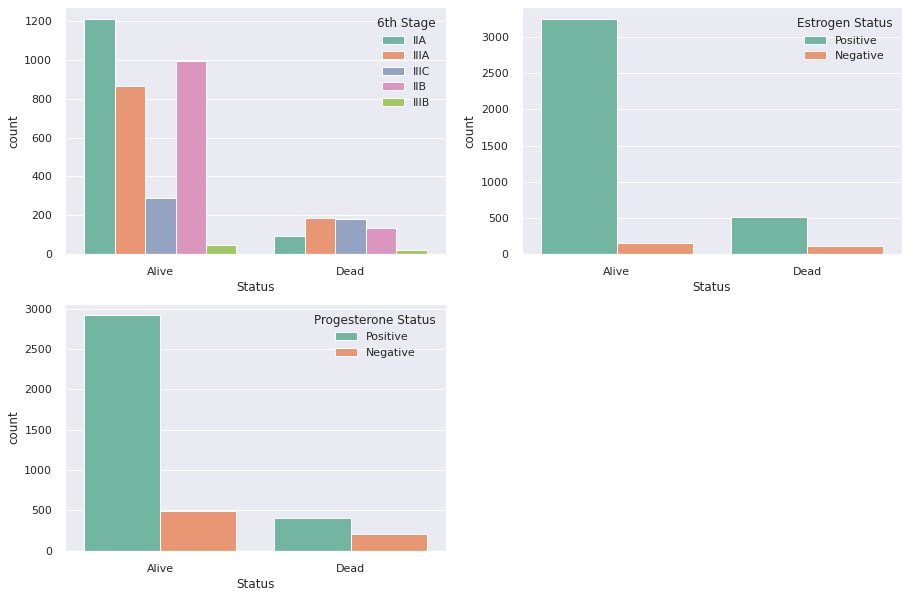

In [ ]:

plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.countplot(x = 'Status', hue= '6th Stage', palette='Set2', data = dset)

plt.subplot(2,2,2)
sns.countplot(x = 'Status', hue= 'Estrogen Status', palette='Set2', data = dset)

plt.subplot(2,2,3)
sns.countplot(x = 'Status', hue= 'Progesterone Status', palette='Set2', data = dset)

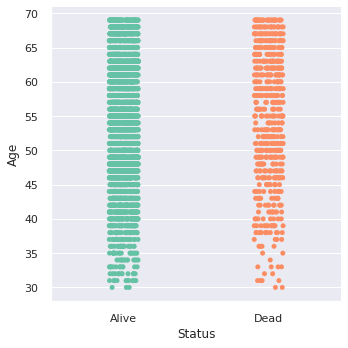

In [ ]:
#In the Age variable we can see that we do not have an age standard to influence the result.
sns.catplot(x = "Status", y = "Age", palette = "Set2", data = dset)


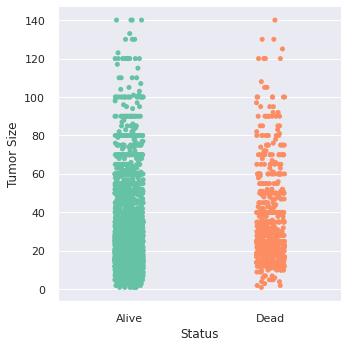

In [ ]:
#Same thing for the Tumor Size variable, we don't have much difference when we look at our Target variable.
sns.catplot(x = "Status", y = "Tumor Size", palette = "Set2", data = dset)

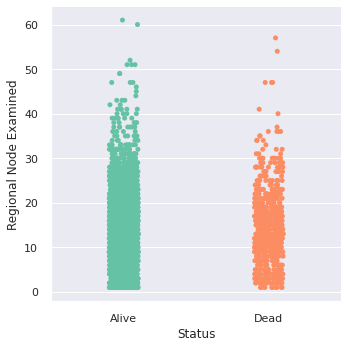

In [ ]:
#This variable is interesting, we can see that people with higher levels are less likely to die.
sns.catplot(x = "Status", y = "Regional Node Examined", palette = "Set2", data = dset)

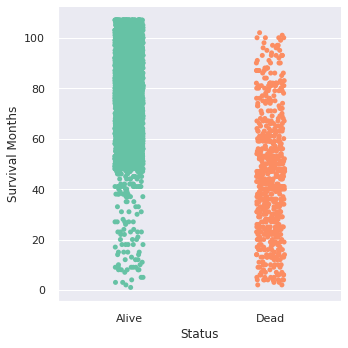

In [ ]:
#Here in this variable we can see that people with higher values ​​in Survival Months are less likely to die.
sns.catplot(x = "Status", y = "Survival Months", palette = "Set2", data = dset)

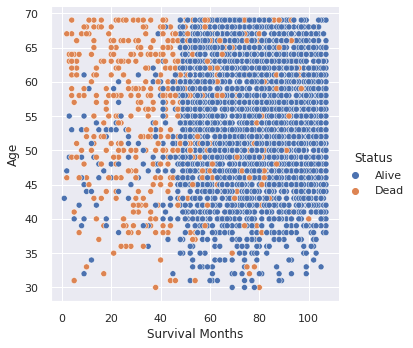

In [ ]:
"""Comparing our Survival Months Variable with Age we can see 
the behavior seen above, the longer the Survival Months the less
 likely a person is to die, and when we look at the age variable 
 we don't have much difference between death between adults 
and young people."""

sns.relplot(x='Survival Months', y = 'Age', hue = "Status", data = dset)



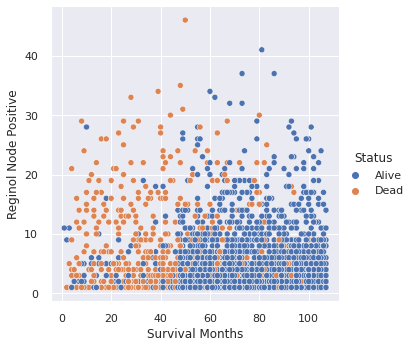

In [ ]:
#Comparing our Survival Months Variable with Regional Node 
#Positive we can see the behavior seen before, the longer the 
#Survival Months the less likely a person is to die, and when we 
#look at the Regionol node Positive variable we don't have much 
#difference between death and life.

sns.relplot(x='Survival Months', y = 'Reginol Node Positive', hue = "Status", data = dset)


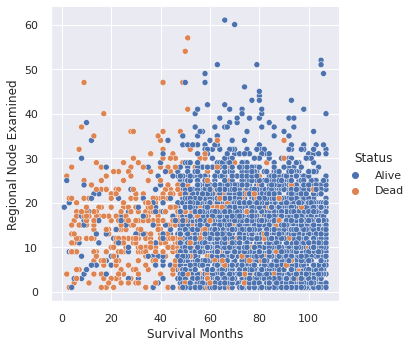

In [ ]:
#### Comparing our Survival Months Variable with Regional Node Examined we can see the behavior seen before, the longer the Survival Months the less likely a person is to die, and when we look at the Regional node Examined variable we don't have much difference between death and life.
sns.relplot(x='Survival Months', y = 'Regional Node Examined', hue = "Status", data = dset)

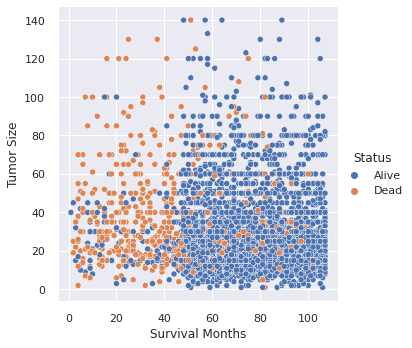

In [ ]:
#### Comparing our Survival Months Variable with TumorSize we can see the behavior seen before, the longer the Survival Months the less likely a person is to die, and when we look at the Tumor Size variable we don't have much difference between death and life.
sns.relplot(x='Survival Months', y = 'Tumor Size', hue = "Status", data = dset)

## MOdel Building

In [ ]:
X = dset.iloc[:,0:15].values
Y = dset.iloc[:,15].values


#Balancing Classes
##Analyzing the data we can see that we have a lot more data with Non Alive, so the models will learning more about this data than when the person Alive and can't learn about when this person will has Die, then we need to balance the classes and see what we can do with this data.
##Here we use the function OverSampling to balancing the classes, we are doing a Oversampling and both target variable will have the same number of samples.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=41)

In [ ]:
x,y = ros.fit_resample(X,Y)

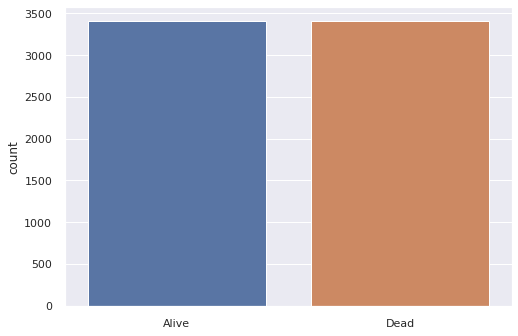

In [ ]:
ax=sns.countplot(x=y)

#Label Encoding  for categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder_race = LabelEncoder()
label_encoder_marital_status = LabelEncoder()
label_encoder_t_stage = LabelEncoder()
label_encoder_n_stage = LabelEncoder()
label_encoder_6th_stage = LabelEncoder()
label_encoder_differentiate = LabelEncoder()
label_encoder_a_stage = LabelEncoder()
label_encoder_estrogene = LabelEncoder()
label_encoder_progesterone = LabelEncoder()
label_encoder_status = LabelEncoder()
label_encoder_grade=LabelEncoder()


In [ ]:
x[:,1] = label_encoder_race.fit_transform(x[:,1])
x[:,2] = label_encoder_marital_status.fit_transform(x[:,2])
x[:,3] = label_encoder_t_stage.fit_transform(x[:,3])
x[:,4] = label_encoder_n_stage.fit_transform(x[:,4])
x[:,5] = label_encoder_6th_stage.fit_transform(x[:,5])
x[:,6] = label_encoder_differentiate.fit_transform(x[:,6])
x[:,7] = label_encoder_grade.fit_transform(x[:,7])
x[:,8] = label_encoder_a_stage.fit_transform(x[:,8])
x[:,10] = label_encoder_estrogene.fit_transform(x[:,10])
x[:,11] = label_encoder_progesterone.fit_transform(x[:,11])

In [ ]:
ls_col

['Age',
 'Race',
 'Marital Status',
 'T Stage ',
 'N Stage',
 '6th Stage',
 'differentiate',
 'Grade',
 'A Stage',
 'Tumor Size',
 'Estrogen Status',
 'Progesterone Status',
 'Regional Node Examined',
 'Reginol Node Positive',
 'Survival Months',
 'Status']

In [ ]:
x

array([[68, 2, 1, ..., 24, 1, 60],
       [50, 2, 1, ..., 14, 5, 62],
       [58, 2, 0, ..., 14, 7, 75],
       ...,
       [66, 2, 1, ..., 12, 8, 90],
       [52, 2, 3, ..., 5, 1, 45],
       [43, 2, 0, ..., 16, 10, 84]], dtype=object)

In [ ]:
y = label_encoder_status.fit_transform(y)

We will run the models before scaling the data, after we will back here to run the StandardScaler and MinMax Scaler and verify if we have best results using the scaling.

In [ ]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(x)



In [ ]:
X_standard[0]

array([ 1.45733075,  0.4144883 , -0.37329221, -1.11101437, -0.77242396,
       -1.17370689,  0.36179498,  1.19419537,  0.19186371, -1.29748916,
        0.34792619,  0.55543182,  1.14244619, -0.70258385, -0.03618857])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
obj_norm = MinMaxScaler().fit(x)

In [ ]:
X_normalization = obj_norm.transform(x)

In [ ]:
X_normalization[0]

array([0.97435897, 1.        , 0.25      , 0.        , 0.        ,
       0.        , 0.33333333, 1.        , 1.        , 0.02158273,
       1.        , 1.        , 0.38333333, 0.        , 0.55660377])

Trransform data into train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_normalization,y,test_size=0.3,random_state=41)


In [ ]:
x_train.shape,y_train.shape

((4771, 15), (4771,))

## Using models

#Naive Bayes

Here we will use the Naive Bayes Model, we will test Gaussian model, using our Normal Data, StandardScaler Data and MinMax Data.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)

GaussianNB()

In [ ]:
previsoes = naive_bayes.predict(x_test)

In [ ]:
confusn = confusion_matrix(y_test,previsoes)

0.7168704156479218

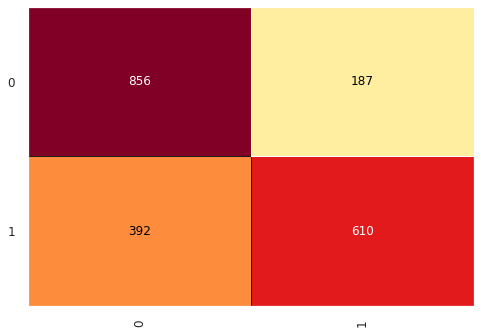

In [ ]:
# Normal Data 

cm = ConfusionMatrix(naive_bayes)
cm.fit(x_train,y_train)
cm.score(x_test,y_test)

In [ ]:
classification_naive_gaussian = (classification_report(y_test,previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1043
           1       0.77      0.61      0.68      1002

    accuracy                           0.72      2045
   macro avg       0.73      0.71      0.71      2045
weighted avg       0.72      0.72      0.71      2045



0.7168704156479218

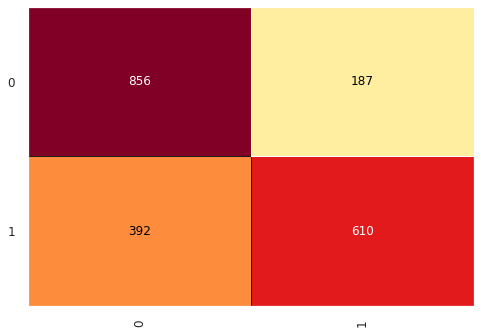

In [ ]:
# Standard Scaler
cm = ConfusionMatrix(naive_bayes)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

0.7168704156479218

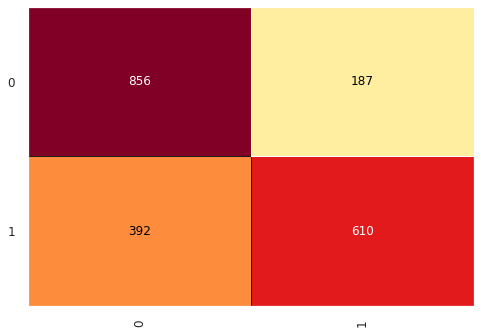

In [ ]:
#MinMAxScaler

cm = ConfusionMatrix(naive_bayes)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

#Decision Tree

In [ ]:
#Here we will use the Decision Tree Model, we will test Entropy and Gini calculations, using our Normal Data.

arvore_entropy = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,
                                        random_state=41)

In [ ]:
arvore_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=41)

In [ ]:
previsoes = arvore_entropy.predict(x_test)

#Here we can see the tree and the decision rules.
Here we can see that it uses the Survival Months variable to make the first decision of the tree, we also have the 6th Stage variable as a death decision or not.

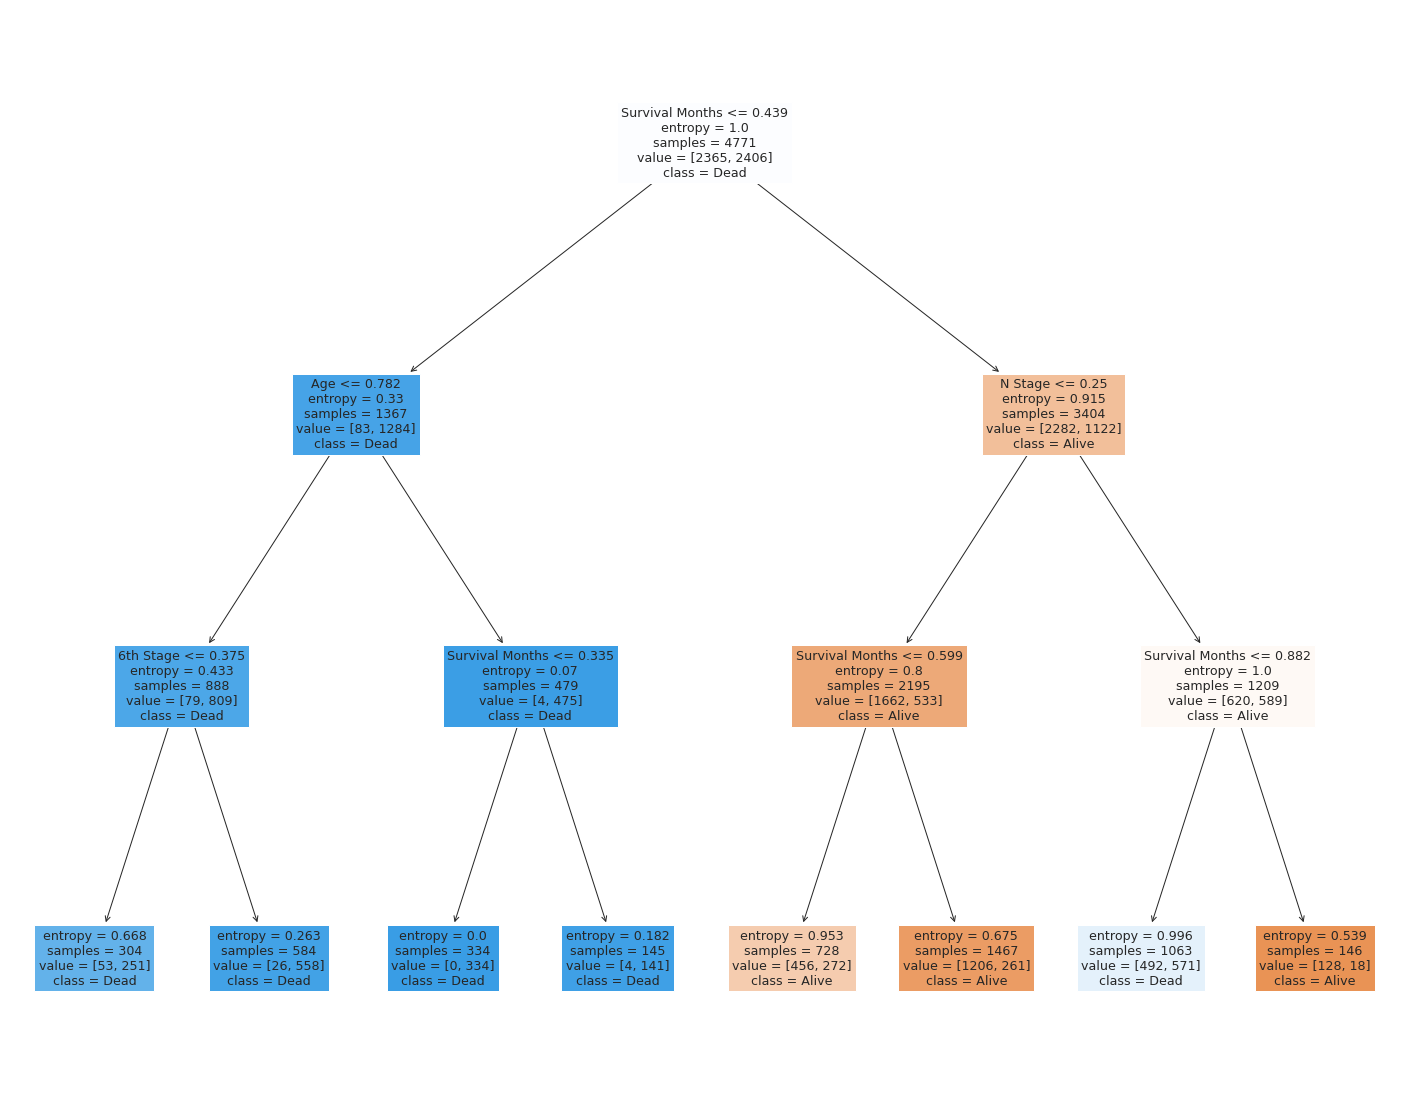

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(arvore_entropy, feature_names=dset.columns[:-1], class_names=['Alive', 'Dead'], filled=True);

0.7687041564792176

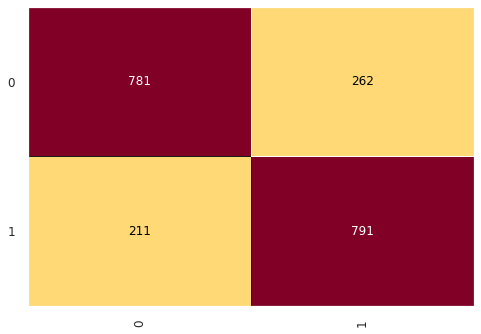

In [ ]:
#Normal Data
cm = ConfusionMatrix(arvore_entropy)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [ ]:
classification_decision_entropy = (classification_report(y_test, previsoes))

print(classification_decision_entropy)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1043
           1       0.75      0.79      0.77      1002

    accuracy                           0.77      2045
   macro avg       0.77      0.77      0.77      2045
weighted avg       0.77      0.77      0.77      2045



##checking the important variables of the model

In [ ]:
columns = dset.iloc[:,0:15].columns

In [ ]:
feature_imp = pd.Series(arvore_entropy.feature_importances_, index = columns).sort_values(ascending = False)

In [ ]:
feature_imp

Survival Months           0.865164
N Stage                   0.095351
Age                       0.021481
6th Stage                 0.018004
Race                      0.000000
Marital Status            0.000000
T Stage                   0.000000
differentiate             0.000000
Grade                     0.000000
A Stage                   0.000000
Tumor Size                0.000000
Estrogen Status           0.000000
Progesterone Status       0.000000
Regional Node Examined    0.000000
Reginol Node Positive     0.000000
dtype: float64

In [ ]:
#running gini Impurity

arvore_gini = DecisionTreeClassifier(max_depth=3,random_state=41)

In [ ]:
arvore_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=41)

In [ ]:
previsoes = arvore_gini.predict(x_test)

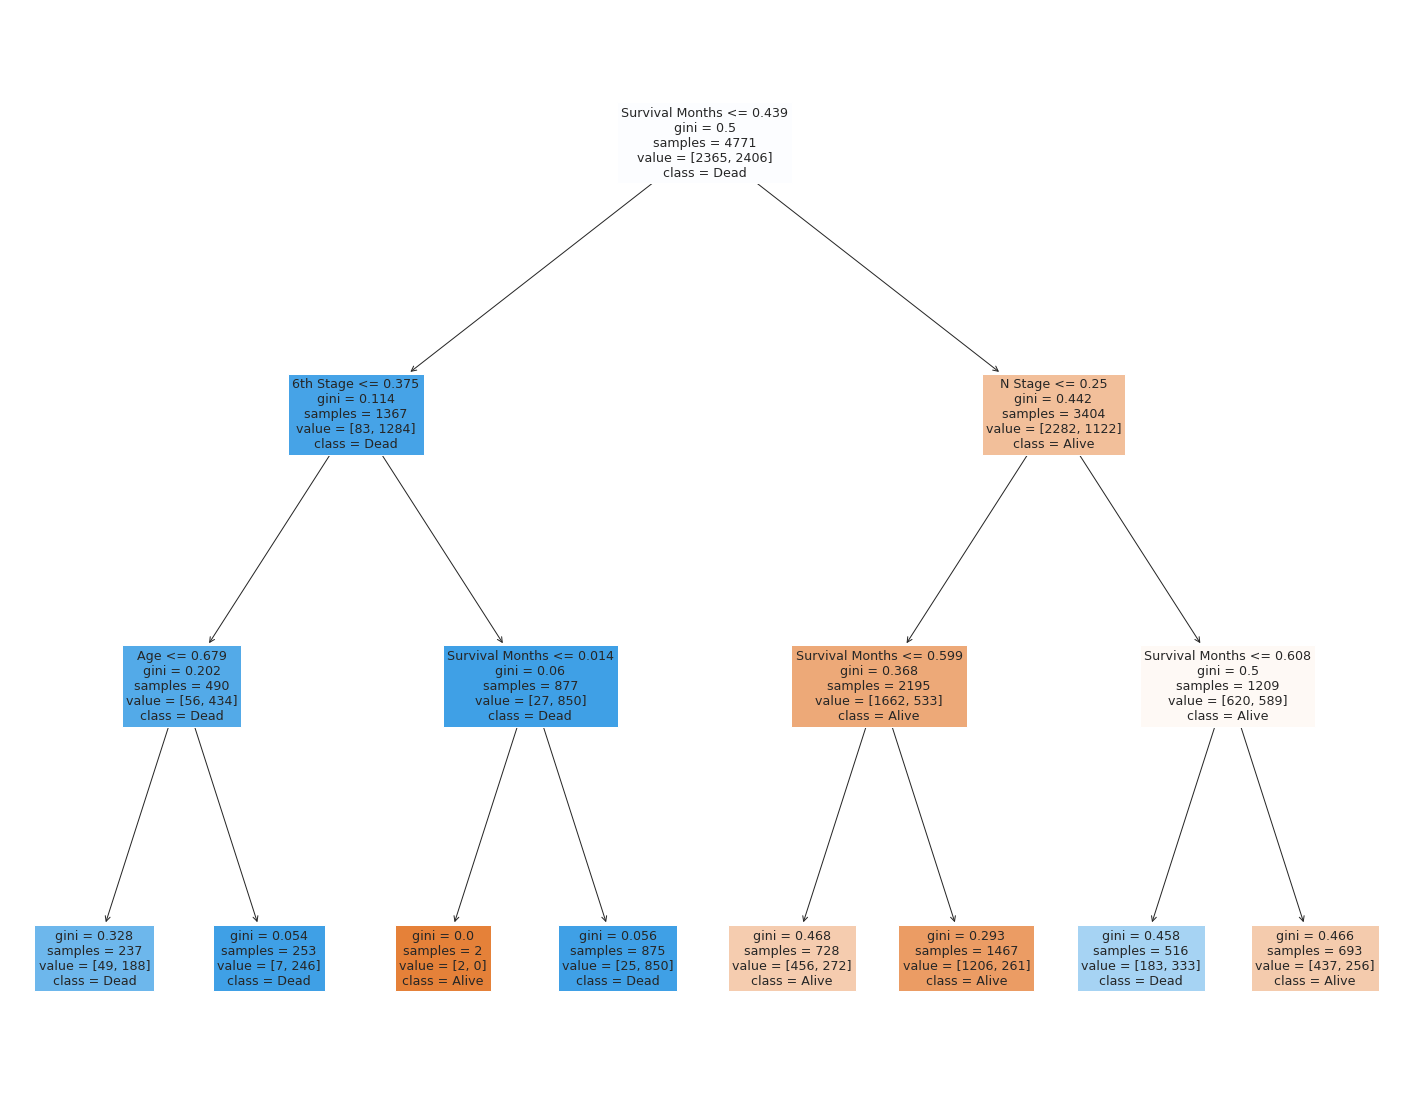

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(arvore_gini, feature_names=dset.columns[:-1], class_names=['Alive', 'Dead'], filled=True);

0.7936430317848411

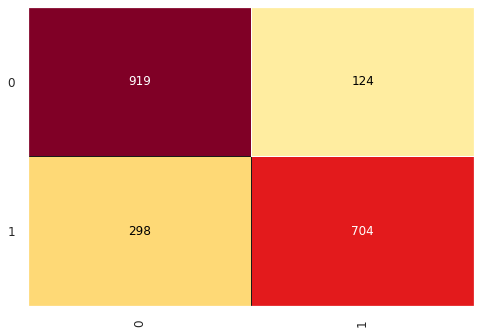

In [ ]:
cm = ConfusionMatrix(arvore_gini)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [ ]:
classification_decision_gini = (classification_report(y_test, previsoes))
print(classification_decision_gini)

              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1043
           1       0.85      0.70      0.77      1002

    accuracy                           0.79      2045
   macro avg       0.80      0.79      0.79      2045
weighted avg       0.80      0.79      0.79      2045



In [ ]:
# checking important variables of the model

feature_imp = pd.Series(arvore_gini.feature_importances_, index = columns).sort_values(ascending = False)

In [ ]:
feature_imp

Survival Months           0.885068
N Stage                   0.101585
Age                       0.008564
6th Stage                 0.004783
Race                      0.000000
Marital Status            0.000000
T Stage                   0.000000
differentiate             0.000000
Grade                     0.000000
A Stage                   0.000000
Tumor Size                0.000000
Estrogen Status           0.000000
Progesterone Status       0.000000
Regional Node Examined    0.000000
Reginol Node Positive     0.000000
dtype: float64

#Random Forest
Here we will use the Random Forest Model, we will test Entropy and Gini calculations, using our Normal Data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators = 100, max_depth= 3, criterion = 'entropy', random_state = 41)
random_forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=41)

In [ ]:
pre = random_forest.predict(x_test)

0.7809290953545233

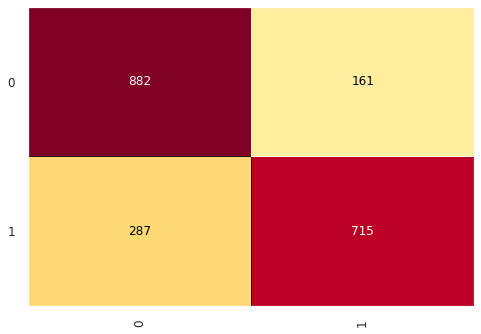

In [ ]:
cm = ConfusionMatrix(random_forest)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [ ]:
classification_random_entropy = (classification_report(y_test, previsoes))
print(classification_random_entropy)

              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1043
           1       0.85      0.70      0.77      1002

    accuracy                           0.79      2045
   macro avg       0.80      0.79      0.79      2045
weighted avg       0.80      0.79      0.79      2045



In [ ]:
#import features

feature_imp = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)


In [ ]:
feature_imp

Survival Months           0.465572
Reginol Node Positive     0.136022
6th Stage                 0.125231
N Stage                   0.069322
Progesterone Status       0.047559
Tumor Size                0.032464
Estrogen Status           0.030753
Grade                     0.021883
Age                       0.020960
differentiate             0.018486
T Stage                   0.017364
Race                      0.005756
Regional Node Examined    0.005060
A Stage                   0.002605
Marital Status            0.000963
dtype: float64

In [ ]:
#gini
random_forest = RandomForestClassifier(n_estimators = 100, max_depth= 3,criterion = 'gini', random_state = 41)
random_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, random_state=41)

In [ ]:
prez = random_forest.predict(x_test)

0.7858190709046454

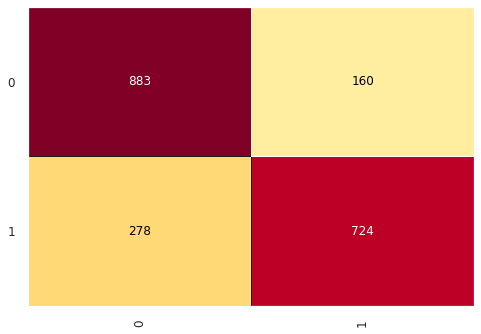

In [ ]:
cm = ConfusionMatrix(random_forest)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

#K-Means
Here we will use the K-Means Model, using our Normal Data, StandardScaler Data and MinMax Data, here we use the GridSearch Model to figure out the best metrics to use in this model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(metric = 'minkowski', p = 2)

In [ ]:
#Here we use the GridSearch to figure out the best metrics to use in this model.
k_list = list(range(1,31))

k_values = dict(n_neighbors = k_list)


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(knn, k_values, cv = 5, scoring = 'accuracy')

In [ ]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [ ]:
grid.best_params_,grid.best_score_

({'n_neighbors': 1}, 0.9216071212969366)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pro = knn.predict(x_train)

0.9383863080684597

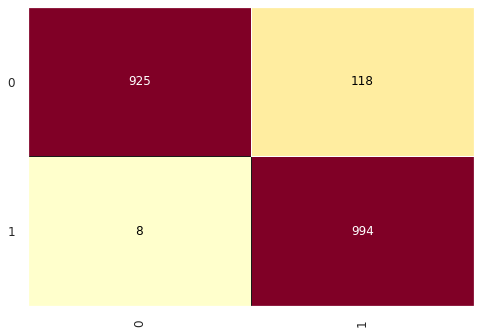

In [ ]:
cm = ConfusionMatrix(knn)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [ ]:
# do check for data standard scaler and min max scaler

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 41)
logistic.fit(x_train, y_train)
previsoes = logistic.predict(x_test)

0.8

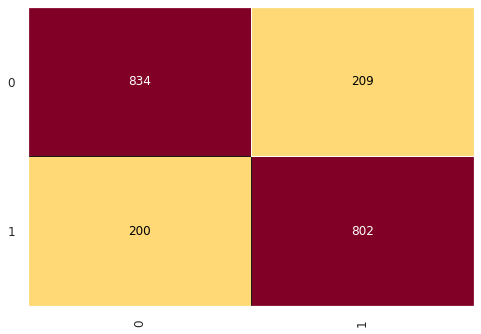

In [ ]:
cm = ConfusionMatrix(logistic)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [ ]:
logistic_minmax = classification_report(y_test, previsoes)
print(logistic_minmax)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1043
           1       0.79      0.80      0.80      1002

    accuracy                           0.80      2045
   macro avg       0.80      0.80      0.80      2045
weighted avg       0.80      0.80      0.80      2045



#SVM
Here we will use the SVM Model, using our Normal Data, StandardScaler Data and MinMax Data, we will test Three Kernels (Linear, RBF and Poly).
 

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 1, C = 1.0)
svm.fit(x_train, y_train)
previsoes = svm.predict(x_test)

0.7990220048899755

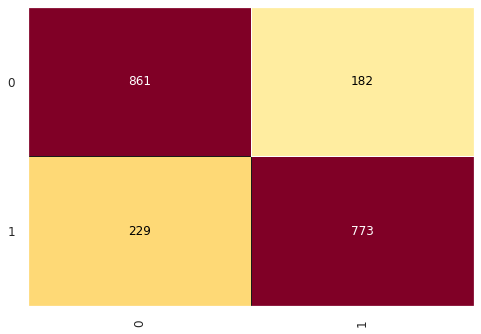

In [ ]:
cm = ConfusionMatrix(svm)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [ ]:
# running RBF kernel

svm = SVC(kernel = 'rbf', random_state = 1, C = 1.0)
svm.fit(x_train, y_train)
previsoes = svm.predict(x_test)

0.8088019559902201

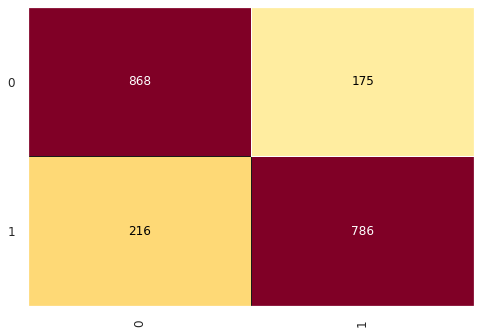

In [ ]:
cm = ConfusionMatrix(svm)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [ ]:
# on poly


svm = SVC(kernel = 'poly', random_state = 1, C = 1.0)
svm.fit(x_train, y_train)
previsoes = svm.predict(x_test)

0.8151589242053789

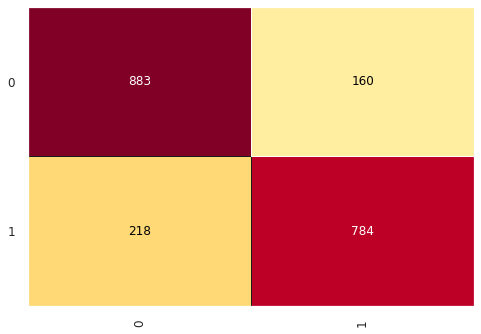

In [ ]:
cm = ConfusionMatrix(svm)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

#Checking the results

In [ ]:
# reference link

#https://www.kaggle.com/code/raphaelmarconato/breast-cancer-eda-balancing-and-ml/notebook#-3.-Model-Building.-